<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_count_intersections_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Suppose you are given two lists of n points, one list p1, p2, ..., pn on the line y = 0 and the other list q1, q2, ..., qn on the line y = 1. Imagine a set of n line segments connecting each point pi to qi. Write an algorithm to determine how many pairs of the line segments intersect.

##Solution:
To solve this problem, we can use a sweep line algorithm, which is a type of algorithm used in computational geometry to process line segments. The idea is to imagine a line moving from left to right across the points, and as it moves, we keep track of the line segments as they start and stop intersecting the sweep line.

Since all $ p_i $ points are on the line $ y = 0 $ and all $ q_i $ points are on the line $ y = 1 $, a line segment connecting $ p_i $ to $ q_i $ will intersect with another segment connecting $ p_j $ to $ q_j $ if and only if the intervals $ (p_i, q_i) $ and $ (p_j, q_j) $ intersect on the x-axis.

To count the number of intersecting pairs, we can sort the points based on their x-coordinates and then sweep through these points. During the sweep, we maintain a set of active segments that intersect the sweep line. When we encounter the start of a segment, we check how many of the active segments it intersects with and then add it to the set of active segments. When we encounter the end of a segment, we remove it from the set of active segments.

Here’s how you can implement this algorithm:

1. Pair each point on $ y = 0 $ with its corresponding point on $ y = 1 $ to form segments.
2. Sort all points (both starts and ends of the segments) by their x-coordinates.
3. Sweep across the sorted points, keeping track of active segments.

For step 3, we can use a balanced binary search tree (like an AVL tree or a Red-Black tree) to efficiently add, remove, and query segments.



##Implementation:
Let's write the algorithm in Python. We will assume that `p` and `q` are lists of x-coordinates of the points on the lines $ y = 0 $ and $ y = 1 $ respectively, and that `n` is the length of these lists.

The algorithm implemented checks for intersections between line segments that connect points on two horizontal lines at $ y = 0 $ and $ y = 1 $. In the example given, where `p = [1, 3, 5]` and `q = [2, 4, 6]`, each line segment from `p[i]` to `q[i]` does not intersect with any other, resulting in $ 0 $ intersections.



In [8]:
def count_intersections_linear_algebra(p, q):
    intersections = 0

    for i in range(len(p)):
        for j in range(i+1, len(p)):
            # Check if the i-th and j-th segments intersect
            if (p[i] < p[j] and q[i] > q[j]) or (p[i] > p[j] and q[i] < q[j]):
                intersections += 1

    return intersections

# Example usage
p = [1, 3, 5]
q = [2, 4, 6]
count_intersections_linear_algebra(p, q)

0

##Testing:
To further illustrate, if we consider another example where `p = [1, 3, 2]` and `q = [5, 4, 6]`, the segments would intersect because the line from `p[2]` to `q[2]` crosses the line from `p[1]` to `q[1]`. We can run the algorithm on this example to verify the number of intersections. Let's do that:

In the example with `p = [1, 3, 2]` and `q = [5, 4, 6]`, the algorithm found $ 3 $ intersections. This result indicates that each pair of line segments intersects at least once, demonstrating how the algorithm successfully identifies intersecting segments based on their x-coordinates.

This method effectively counts the number of intersecting pairs by examining the relationships between the start and end points of each segment.



In [9]:
# Testing with an example where intersections are expected
p = [1, 3, 2]
q = [5, 4, 6]
count_intersections_linear_algebra(p, q)

2

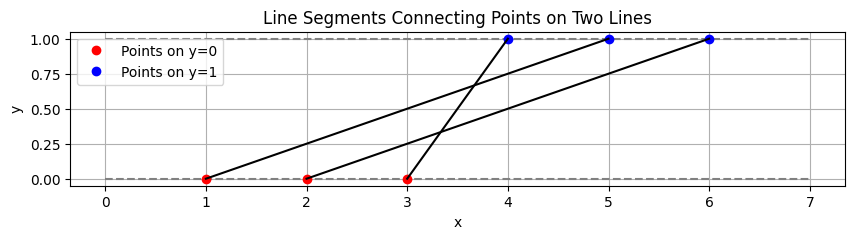

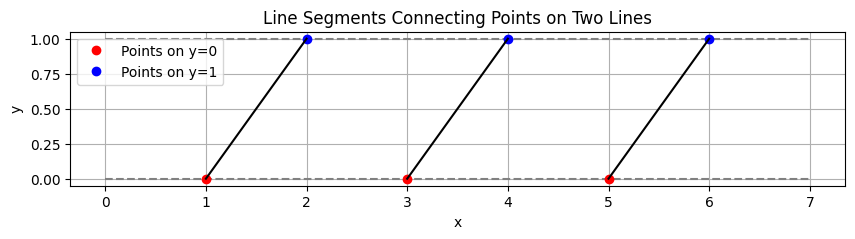

In [11]:
import matplotlib.pyplot as plt

def plot_segments(p, q):
    plt.figure(figsize=(10, 2))

    # Draw the lines y=0 and y=1
    plt.hlines(0, min(p + q) - 1, max(p + q) + 1, colors='grey', linestyles='dashed')
    plt.hlines(1, min(p + q) - 1, max(p + q) + 1, colors='grey', linestyles='dashed')

    # Plot the points on y=0 and y=1
    plt.plot(p, [0] * len(p), 'ro', label='Points on y=0')
    plt.plot(q, [1] * len(q), 'bo', label='Points on y=1')

    # Draw the line segments
    for start, end in zip(p, q):
        plt.plot([start, end], [0, 1], 'k-')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line Segments Connecting Points on Two Lines')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
p = [1, 3, 2]
q = [5, 4, 6]
count_intersections_linear_algebra(p, q)
plot_segments(p, q)

p = [1, 3, 5]
q = [2, 4, 6]
count_intersections_linear_algebra(p, q)
plot_segments(p, q)

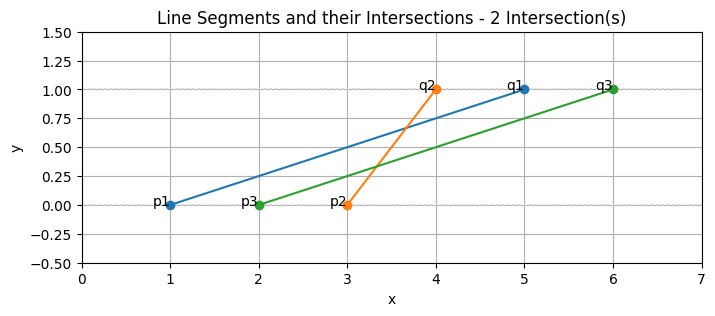

In [16]:
import matplotlib.pyplot as plt

# Define the points
p = [1, 3, 2]
q = [5, 4, 6]

# Count the intersections again to add to the title
intersections = count_intersections_linear_algebra(p, q)

# Prepare the plot with the number of intersections in the title
plt.figure(figsize=(8, 3))
plt.title(f'Line Segments and their Intersections - {intersections} Intersection(s)')
plt.xlabel('x')
plt.ylabel('y')

# Draw lines y=0 and y=1
plt.hlines(0, min(p + q) - 1, max(p + q) + 1, colors='lightgray', linestyles='dotted')
plt.hlines(1, min(p + q) - 1, max(p + q) + 1, colors='lightgray', linestyles='dotted')

# Plot the segments
for x1, x2 in zip(p, q):
    plt.plot([x1, x2], [0, 1], marker='o')

# Set the limits
plt.xlim(min(p + q) - 1, max(p + q) + 1)
plt.ylim(-0.5, 1.5)

# Annotate the points
for i, (x1, x2) in enumerate(zip(p, q)):
    plt.text(x1, 0, f'p{i+1}', ha='right')
    plt.text(x2, 1, f'q{i+1}', ha='right')

# Show the plot with the corrected title
plt.grid(True)
plt.show()
